In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import ast
from ast import literal_eval
from wordcloud import WordCloud
import warnings  # disable python warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading Data
movies_data=pd.read_csv("movies_metadata.csv", low_memory=False)
credits = pd.read_csv('credits.csv')
keywords = pd.read_csv('keywords.csv')
links_small = pd.read_csv('links_small.csv')
ratings = pd.read_csv("ratings_small.csv")

In [3]:
movies_data=movies_data[['genres','id','overview','tagline','title','vote_average','vote_count']]
movies_data.head(10)

,genres,id,overview,tagline,title,vote_average,vote_count
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,"Led by Woody, Andy's toys live happily in his ...",NaN,Toy Story,7.7,5415.0
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0
4,"[{'id': 35, 'name': 'Comedy'}]",11862,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0
5,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,"Obsessive master thief, Neil McCauley leads a ...",A Los Angeles Crime Saga,Heat,7.7,1886.0
6,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",11860,An ugly duckling having undergone a remarkable...,You are cordially invited to the most surprisi...,Sabrina,6.2,141.0
7,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",45325,"A mischievous young boy, Tom Sawyer, witnesses...",The Original Bad Boys.,Tom and Huck,5.4,45.0
8,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,International action superstar Jean Claude Van...,Terror goes into overtime.,Sudden Death,5.5,174.0
9,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,James Bond must unmask the mysterious head of ...,No limits. No fears. No substitutes.,GoldenEye,6.6,1194.0


In [4]:
#isnull().sum() is used to iterate thorugh columns and get the of null values mapping with each column
print(movies_data.isnull().sum(),'\n')
print(credits.isnull().sum(),'\n')
print(keywords.isnull().sum(),'\n')
print(links_small.isnull().sum(),'\n')
print(ratings.isnull().sum(),'\n')

genres              0
id                  0
overview          954
tagline         25054
title               6
vote_average        6
vote_count          6
dtype: int64 

cast    0
crew    0
id      0
dtype: int64 

id          0
keywords    0
dtype: int64 

movieId     0
imdbId      0
tmdbId     13
dtype: int64 

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64 



In [5]:
#removies rows with null value in vote_average and vote_count columns in movies_data
movies_data = movies_data.dropna(subset=['vote_average', 'vote_count'])
print(movies_data.isnull().sum(),'\n')

genres              0
id                  0
overview          954
tagline         25048
title               0
vote_average        0
vote_count          0
dtype: int64 



In [6]:
# df = px.data.tips()
# fig = px.histogram(df, x='vote_average')
# fig.show()

In [7]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L

In [8]:
movies_data['genres'] = movies_data['genres'].apply(convert)
movies_data.head()

,genres,id,overview,tagline,title,vote_average,vote_count
0,"[Animation, Comedy, Family]",862,"Led by Woody, Andy's toys live happily in his ...",NaN,Toy Story,7.7,5415.0
1,"[Adventure, Fantasy, Family]",8844,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
2,"[Romance, Comedy]",15602,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0
3,"[Comedy, Drama, Romance]",31357,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0
4,[Comedy],11862,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0


In [9]:
#using IMDB's weighted rating formula

def weighted_rating(v,R):
    return ((v/(v+m))*R)+((m/(m+v))*C)

C=movies_data['vote_average'].mean()
m=movies_data['vote_count'].quantile(0.95) #movies with more than 95% vote

#Now taking movies whose vote count is greater than m
top_movies = movies_data.copy().loc[movies_data['vote_count'] >= m]
top_movies = top_movies.reset_index()


top_movies['score']='' #creating a new column 'score'

for i in range(top_movies.shape[0]):
    v=top_movies['vote_count'][i]
    R=top_movies['vote_average'][i]
    top_movies['score'][i]=weighted_rating(v,R)

#sorting in Descending Order
top_movies = top_movies.sort_values('score', ascending=False)
top_movies = top_movies.reset_index()


top_movies.head(5)

,level_0,index,genres,id,overview,tagline,title,vote_average,vote_count,score
0,46,314,"[Drama, Crime]",278,Framed in the 1940s for the double murder of h...,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8358.0,8.357746
1,111,834,"[Drama, Crime]",238,"Spanning the years 1945 to 1955, a chronicle o...",An offer you can't refuse.,The Godfather,8.5,6024.0,8.306334
2,1135,12481,"[Drama, Action, Crime, Thriller]",155,Batman raises the stakes in his war on crime. ...,Why So Serious?,The Dark Knight,8.3,12269.0,8.208376
3,439,2843,[Drama],550,A ticking-time-bomb insomniac and a slippery s...,Mischief. Mayhem. Soap.,Fight Club,8.3,9678.0,8.184899
4,43,292,"[Thriller, Crime]",680,"A burger-loving hit man, his philosophical par...",Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8670.0,8.172155


## Genre Based Recommender

In [10]:
genres=set()

# Finding the exhaustive set of genres in the dataset 

#top_movies['genres'] = top_movies['genres'].apply(literal_eval)


for i in range(top_movies['genres'].shape[0]):   # converting string in map
    for x in top_movies['genres'][i]:
        #print(x)
        genres.add(x)
        
    
# creating map of string (genre name) and movies names(dataframe)
genres_based = dict()

for i in range(top_movies['genres'].shape[0]): 
     for x in top_movies['genres'][i]:
        if x not in genres_based.keys():
             genres_based[x] = pd.DataFrame(columns = top_movies.columns)
        genres_based[x] = genres_based[x].append(top_movies.iloc[i])

In [11]:
def genres_based_recmnd(name):
    ans1=""
    if name not in genres:
        return "Not Found"
    else:
        #ans1 = genres_based[name]['title']
        #return ans1
        return genres_based[name]['title']
        
#print(genres_based_recmnd("Comedy"))

## Contest Based

In [12]:
movies_data.shape

(45460, 7)

In [13]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [14]:
# movies_data=movies_data[['genres','id','tagline','title','vote_average','vote_count']]
# movies_data.head()

In [15]:
movies_data['id'] = movies_data['id'].astype('int')
movies_data=movies_data.merge(credits,on='id')
movies_data=movies_data.merge(keywords,on='id')

In [16]:
links_small.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [17]:
#movies_data.shape
#keywords.head()

In [18]:
movies_data.dropna(inplace=True)

In [19]:
movies_data['keywords'] = movies_data['keywords'].apply(convert)
#movies_data.head()
movies_data.shape

(20774, 10)

In [20]:
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L 

In [21]:
movies_data['cast'] = movies_data['cast'].apply(convert3)
movies_data.head()

,genres,id,overview,tagline,title,vote_average,vote_count,cast,crew,keywords
1,"[Adventure, Fantasy, Family]",8844,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[board game, disappearance, based on children'..."
2,"[Romance, Comedy]",15602,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret]","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[fishing, best friend, duringcreditsstinger, o..."
3,"[Comedy, Drama, Romance]",31357,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devine]","[{'credit_id': '52fe44779251416c91011acb', 'de...","[based on novel, interracial relationship, sin..."
4,[Comedy],11862,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short]","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[baby, midlife crisis, confidence, aging, daug..."
5,"[Action, Crime, Drama, Thriller]",949,"Obsessive master thief, Neil McCauley leads a ...",A Los Angeles Crime Saga,Heat,7.7,1886.0,"[Al Pacino, Robert De Niro, Val Kilmer]","[{'credit_id': '52fe4292c3a36847f802916d', 'de...","[robbery, detective, bank, obsession, chase, s..."


In [22]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

In [23]:
movies_data['crew'] = movies_data['crew'].apply(fetch_director)
movies_data.head()

,genres,id,overview,tagline,title,vote_average,vote_count,cast,crew,keywords
1,"[Adventure, Fantasy, Family]",8844,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",[Joe Johnston],"[board game, disappearance, based on children'..."
2,"[Romance, Comedy]",15602,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret]",[Howard Deutch],"[fishing, best friend, duringcreditsstinger, o..."
3,"[Comedy, Drama, Romance]",31357,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devine]",[Forest Whitaker],"[based on novel, interracial relationship, sin..."
4,[Comedy],11862,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short]",[Charles Shyer],"[baby, midlife crisis, confidence, aging, daug..."
5,"[Action, Crime, Drama, Thriller]",949,"Obsessive master thief, Neil McCauley leads a ...",A Los Angeles Crime Saga,Heat,7.7,1886.0,"[Al Pacino, Robert De Niro, Val Kilmer]",[Michael Mann],"[robbery, detective, bank, obsession, chase, s..."


In [24]:
# movies_data = movies_data[['genres','id','tagline','title','cast','crew','keywords']]
# movies_data.head()

In [25]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [26]:
movies_data['cast'] = movies_data['cast'].apply(collapse)
movies_data['crew'] = movies_data['crew'].apply(collapse)
movies_data['genres'] = movies_data['genres'].apply(collapse)
movies_data['keywords'] = movies_data['keywords'].apply(collapse)

In [27]:
movies_data.head()

,genres,id,overview,tagline,title,vote_average,vote_count,cast,crew,keywords
1,"[Adventure, Fantasy, Family]",8844,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[RobinWilliams, JonathanHyde, KirstenDunst]",[JoeJohnston],"[boardgame, disappearance, basedonchildren'sbo..."
2,"[Romance, Comedy]",15602,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[WalterMatthau, JackLemmon, Ann-Margret]",[HowardDeutch],"[fishing, bestfriend, duringcreditsstinger, ol..."
3,"[Comedy, Drama, Romance]",31357,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[WhitneyHouston, AngelaBassett, LorettaDevine]",[ForestWhitaker],"[basedonnovel, interracialrelationship, single..."
4,[Comedy],11862,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"[SteveMartin, DianeKeaton, MartinShort]",[CharlesShyer],"[baby, midlifecrisis, confidence, aging, daugh..."
5,"[Action, Crime, Drama, Thriller]",949,"Obsessive master thief, Neil McCauley leads a ...",A Los Angeles Crime Saga,Heat,7.7,1886.0,"[AlPacino, RobertDeNiro, ValKilmer]",[MichaelMann],"[robbery, detective, bank, obsession, chase, s..."


In [28]:
movies_data['tagline'] = movies_data['tagline'].apply(lambda x:x.split())
#movies_data.head(5)

In [29]:
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')


# taking only those movies whos id is present in link_small because of limited computing power
smd = movies_data[movies_data['id'].isin(links_small)]  
smd = smd.reset_index()

smd.head()

,index,genres,id,overview,tagline,title,vote_average,vote_count,cast,crew,keywords
0,1,"[Adventure, Fantasy, Family]",8844,When siblings Judy and Peter discover an encha...,"[Roll, the, dice, and, unleash, the, excitement!]",Jumanji,6.9,2413.0,"[RobinWilliams, JonathanHyde, KirstenDunst]",[JoeJohnston],"[boardgame, disappearance, basedonchildren'sbo..."
1,2,"[Romance, Comedy]",15602,A family wedding reignites the ancient feud be...,"[Still, Yelling., Still, Fighting., Still, Rea...",Grumpier Old Men,6.5,92.0,"[WalterMatthau, JackLemmon, Ann-Margret]",[HowardDeutch],"[fishing, bestfriend, duringcreditsstinger, ol..."
2,3,"[Comedy, Drama, Romance]",31357,"Cheated on, mistreated and stepped on, the wom...","[Friends, are, the, people, who, let, you, be,...",Waiting to Exhale,6.1,34.0,"[WhitneyHouston, AngelaBassett, LorettaDevine]",[ForestWhitaker],"[basedonnovel, interracialrelationship, single..."
3,4,[Comedy],11862,Just when George Banks has recovered from his ...,"[Just, When, His, World, Is, Back, To, Normal....",Father of the Bride Part II,5.7,173.0,"[SteveMartin, DianeKeaton, MartinShort]",[CharlesShyer],"[baby, midlifecrisis, confidence, aging, daugh..."
4,5,"[Action, Crime, Drama, Thriller]",949,"Obsessive master thief, Neil McCauley leads a ...","[A, Los, Angeles, Crime, Saga]",Heat,7.7,1886.0,"[AlPacino, RobertDeNiro, ValKilmer]",[MichaelMann],"[robbery, detective, bank, obsession, chase, s..."


In [30]:
smd['tags']=smd['tagline']+smd['genres']+smd['keywords']+smd['cast']+smd['crew']

In [31]:
new = smd.drop(columns=['index','tagline','genres','keywords','cast','crew'])
#new.head()

In [32]:
new['tags'] = new['tags'].apply(lambda x: " ".join(x))
new.head()

,id,overview,title,vote_average,vote_count,tags
0,8844,When siblings Judy and Peter discover an encha...,Jumanji,6.9,2413.0,Roll the dice and unleash the excitement! Adve...
1,15602,A family wedding reignites the ancient feud be...,Grumpier Old Men,6.5,92.0,Still Yelling. Still Fighting. Still Ready for...
2,31357,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale,6.1,34.0,Friends are the people who let you be yourself...
3,11862,Just when George Banks has recovered from his ...,Father of the Bride Part II,5.7,173.0,Just When His World Is Back To Normal... He's ...
4,949,"Obsessive master thief, Neil McCauley leads a ...",Heat,7.7,1886.0,A Los Angeles Crime Saga Action Crime Drama Th...


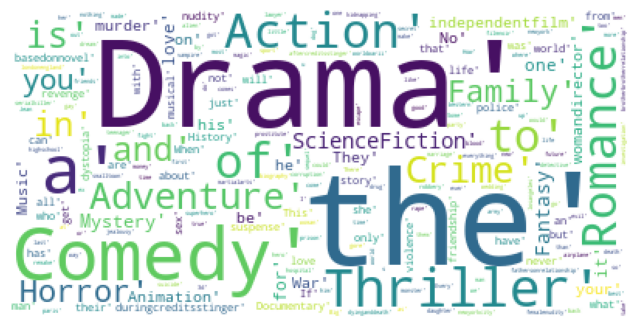

In [33]:
# Creating the Wordcloud for visualisation of the word which occur frequently in the dataset

# Converting smd['tags'] list into a string 

text = ",".join(map(str, smd['tags']))
    
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud
# plot the WordCloud image                      
plt.figure(figsize = (8, 8))
plt.imshow(word_cloud)
plt.axis("off")
 
plt.show()

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [35]:
vector = cv.fit_transform(new['tags']).toarray()

In [36]:
vector.shape

(7082, 5000)

In [37]:
from sklearn.metrics.pairwise import cosine_similarity

In [38]:
similarity = cosine_similarity(vector)

In [39]:
def recommend(movie):
    index = new[new['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    res=""
    for i in distances[0:5]:
        res+=new.iloc[i[0]].title
        res+="\n"
    return res

In [40]:
import pickle

In [41]:
pickle.dump(new,open('movie_list.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))

## Tkinter

In [44]:
import tkinter as tk
import tkinter.ttk
from tkinter import *
import tkinter.messagebox

# create root window
root = Tk()

# root window title and dimension4
root.title("ARTflix")

# Set geometry (widthxheight)
root.geometry("1250x580")

def selected(event):
    string = clicked.get()
    label2.config(text=genres_based_recmnd(string))

    
    

# Dropdown menu options
options = [
    'Action',
    'Adventure',
    'Animation',
    'Comedy',
    'Crime',
    'Documentary',
    'Drama',
    'Family',
    'Fantasy',
    'History',
    'Horror',
    'Music',
    'Mystery',
    'Romance',
    'Science Fiction',
    'TV Movie',
    'Thriller',
    'War',
    'Western'
]

# adding a label to the root window
l1 = Label(
    root, text="MOVIE RECOMMENDER SYSTEM", fg="blue")
l1.grid(row=0, column=17,columnspan=5)
#l1.config(font=('verdana'))
l2 = Label(root, text="Select genre of the movie you want to watch : ",fg="blue")
l2.grid(row=1, column=0, sticky=W, pady=2)


# datatype of menu text
clicked = StringVar()
# # initial menu text
clicked.set("Select Genre")

# # Create Dropdown menu
drop = OptionMenu(root, clicked, *options,command=selected)
drop.grid(row=3, column=0, sticky=W)

# # Initialize a Label to display the User Input
# label2 = Label(root, text="", font=("Courier 22 bold"))
# label2.grid(row=6, column=1)


def display_text():
    global entry
    string = entry.get()
    label2.config(text=recommend(string))


# Initialize a Label to display the User Input
label2 = Label(root, text="", font=("Courier 22 bold"))
label2.grid(row=8, column=17)

# Create an Entry widget to accept User Input
entry = Entry(root, width=40)
entry.focus_set()
entry.grid(row=4, column=17)

# Create a Button to validate Entry Widget
btn = Button(root, text="Search", width=20,
             command=display_text).grid(row=5, column=17,columnspan=5)


root.mainloop()
